In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  22 12:47:26 2024

@author: LuisDamiánDC_
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
N=1000
L=10.0
Nc=0.4
dx=L/N
a=0.6 #velocidad
g=(5/3)

Definición de variables y creación de arreglos.

In [2]:
x=np.arange(0, L+2*dx, dx)
rho=np.ones(N+2)
Vx=np.zeros(N+2)

def pe(x):
    presion=[]
    for i in range(x):
        if i<=x/2: presion=np.append(presion, 1)
        elif i>x/2: presion=np.append(presion, 10)
    return presion


#Arreglos
pre=pe(N+2)
P=[rho, Vx, pre]

In [3]:
def primtocons(pe1):
    uu=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
    for i in range (0, N+2):
        uu[0][i]=pe1[0][i]
        uu[1][i]=pe1[0][i]*pe1[1][i]
        uu[2][i]=(1/2)*pe1[0][i]*pe1[1][i]**2+pe1[2][i]/(g-1)
    return uu
def primtoflux(pe2):
    f=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
    for i in range (0, N+2):
        f[0][i]=pe2[0][i]*pe2[1][i]
        f[1][i]=pe2[0][i]*pe2[1][i]**2+pe2[2][i]
        ef=(1/2)*pe2[0][i]*pe2[1][i]**2+pe2[2][i]
        f[2][i]=(ef+pe2[2][i]*g/(g-1))*pe2[1][i]
    return f
def constoprim(u1):
    p=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
    for i in range (0, N+2):
        p[0][i]=u1[0][i]
        p[1][i]=u1[1][i]/u1[0][i]
        p[2][i]=(g-1)*(u1[2][i]-(1/2)*(u1[1][i]**2)/u1[0][i])
    return p

In [4]:
up=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
up=primtocons(P)
F=primtoflux(P)

In [5]:
tf=0.1 #tiempo final
t=0
while(t<tf):
    for i in range (3): 
        up[i][0]=up[i][1]
        up[i][N+1]=up[i][N]
    U=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
    U=up
    P=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
    P=constoprim(U)
    dt=Nc*dx/(max(P[1]+np.sqrt(g*P[2]/P[0])+1)) #cambiarlo por el maximo del vector u
    t=t+dt
    #print(P)
    F=[np.zeros(N+2),np.zeros(N+2),np.zeros(N+2)]
    F=primtoflux(P)
    #print(F)
    for j in range(3):
        for i in range(1, N+1):
            Fr=(F[j][i]+F[j][i+1])/2-(dx/(2*dt))*(U[j][i+1]-U[j][i])
            Fl=(F[j][i-1]+F[j][i])/2-(dx/(2*dt))*(U[j][i]-U[j][i-1])
            up[j][i]=U[j][i]-(dt/dx)*(Fr-Fl)    
            #print(j , Fr, Fl, up[j][i], dt, dx)

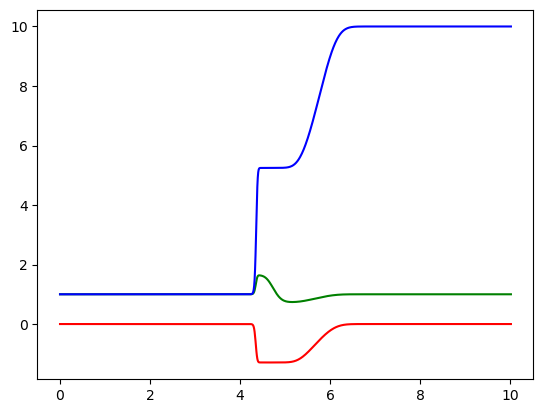

In [6]:
#plt.plot(x, ui, 'y')
plt.plot(x, P[1], 'r')
plt.plot(x, P[0], 'g')
plt.plot(x, P[2], 'b',)